In [1]:
import numpy as np 

from oracle import simulator_moslb
from moslb import moslb

In [2]:
m = 3 # number of objectives
d = 5 # number of context's dimension
K = 5 * d # number of arms at each round

In [3]:
env = simulator_moslb(num_obj=m,num_dim=d,num_arm=K,vary_context=0)
env.reset()

In [4]:
alg = moslb(num_dim=d, num_obj=m)
alg.reset()

In [5]:
T = 1000
R = 0 
R_his = [0]

for t in range(T): 
    X = env.observe_context(verbose=1)
    a_t = alg.take_action(X, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm_context=X[a_t], reward=r_t)

    R += reg_t
    R_his.append(R)
    if (t+1)%100 == 0: print('Round: {:d}, regret: {:.4f}'.format(t, R))

{'#arms': 25,
 '#dimension': 5,
 '#objective': 3,
 '#optimal arms': 15,
 'Regret for each arm': array([[0.04512397],
       [0.00994648],
       [0.0963327 ],
       [0.01014306],
       [0.        ],
       [0.11234802],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.1391167 ],
       [0.        ],
       [0.        ],
       [0.05376203],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.06783539],
       [0.03070243],
       [0.        ],
       [0.06805697],
       [0.        ],
       [0.        ]])}
Round: 99, regret: 1.3390
Round: 199, regret: 3.8230
Round: 299, regret: 6.0117
Round: 399, regret: 7.4920
Round: 499, regret: 8.5995
Round: 599, regret: 9.5644
Round: 699, regret: 11.1301
Round: 799, regret: 12.3341
Round: 899, regret: 13.1210
Round: 999, regret: 13.9562


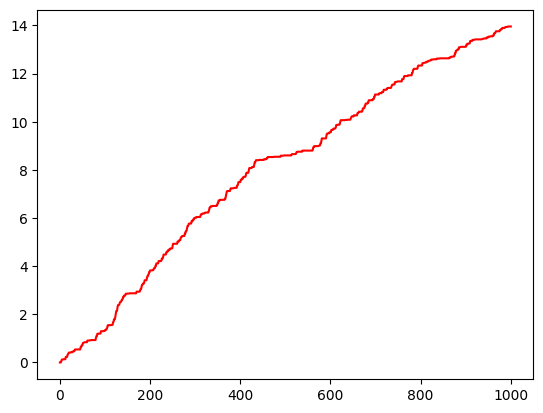

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(T+1), R_his, color='r', linestyle='-', label="P-UCB")

## Example for MOSLB-PL
Running with five objectives under MPL-PL order $\{\{0,1,2\},\{3,4\}\}$.

In [7]:
from oracle import simulator_moslb_pl
from moslb import moslb_pl

In [8]:
pl = [[0,1,2],[3,4]]

In [9]:
env = simulator_moslb_pl(num_dim=d,priority_level=pl,num_arm=K,vary_context=1)

In [10]:
alg = moslb_pl(num_dim=d, priority_level=pl)

In [11]:
T = 3000
R = np.zeros((len(pl),))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm_context=X[a_t], reward=r_t)

    R += reg_t
    if (t+1)%100 == 0: print('Round: {:d}, regret: {}'.format(t, R))

Round: 99, regret: [14.0575653   7.08131146]
Round: 199, regret: [26.05804179 18.39408741]
Round: 299, regret: [38.33923851 28.46861845]
Round: 399, regret: [51.8116317  39.36742602]
Round: 499, regret: [53.09256876 40.82992165]
Round: 599, regret: [53.23188697 41.69596319]
Round: 699, regret: [53.34021291 42.95905153]
Round: 799, regret: [53.57866965 43.95592698]
Round: 899, regret: [53.70836077 45.72598772]
Round: 999, regret: [53.77276717 49.03710248]
Round: 1099, regret: [53.88283845 50.08143932]
Round: 1199, regret: [53.92982545 51.78005266]
Round: 1299, regret: [54.2315067  52.64498133]
Round: 1399, regret: [54.32084707 54.1533472 ]
Round: 1499, regret: [54.79651892 56.10877167]
Round: 1599, regret: [55.01059483 57.73820309]
Round: 1699, regret: [55.27893007 59.806694  ]
Round: 1799, regret: [55.77443216 60.80617301]
Round: 1899, regret: [56.13581657 61.8134323 ]
Round: 1999, regret: [56.1995011  63.95197434]
Round: 2099, regret: [56.38861591 66.14960813]
Round: 2199, regret: [56

## Example for MOSLB-PC
Running with five objectives under MPL-PC relation $\{\{0,1\},\{2,3,4\}\}$.

In [12]:
from oracle import simulator_moslb_pc
from moslb import moslb_pc

In [13]:
pc = [[0,1],[2,3,4]]

In [14]:
env = simulator_moslb_pc(num_dim=d,priority_chain=pc,num_arm=K,vary_context=True)
env.reset()

In [15]:
alg = moslb_pc(num_dim=d, priority_chain=pc)

In [16]:
T = 3000
R = np.zeros((env.c_max,))
epsilon = 5 * d**(2/3) * (T)**(-1/3)

env.reset()
alg.reset()

for t in range(T): 
    X = env.observe_context(verbose=0)
    a_t = alg.take_action(X, epsilon=epsilon, alpha=.1)

    r_t = env.get_reward(a_t)
    reg_t = env.regret(a_t)
    alg.update_params(arm_context=X[a_t], reward=r_t)

    R += reg_t
    if (t+1)%100 == 0: print('Round: {:d}, regret: {}'.format(t, R))

Round: 99, regret: [34.8  31.43  4.92]
Round: 199, regret: [73.59 68.07 11.66]
Round: 299, regret: [112.25 103.93  17.21]
Round: 399, regret: [147.75 127.47  28.59]
Round: 499, regret: [151.39 133.19  28.59]
Round: 599, regret: [154.75 138.47  28.59]
Round: 699, regret: [158.83 144.41  28.59]
Round: 799, regret: [162.78 150.25  28.97]
Round: 899, regret: [163.95 151.35  29.35]
Round: 999, regret: [164.02 151.46  29.35]
Round: 1099, regret: [164.38 151.79  29.35]
Round: 1199, regret: [167.05 152.56  29.73]
Round: 1299, regret: [167.05 152.56  29.73]
Round: 1399, regret: [167.17 153.12  29.73]
Round: 1499, regret: [167.17 153.12  29.73]
Round: 1599, regret: [167.64 153.12  30.11]
Round: 1699, regret: [167.64 153.12  30.11]
Round: 1799, regret: [167.76 153.68  30.11]
Round: 1899, regret: [167.76 153.68  30.11]
Round: 1999, regret: [168.23 153.68  30.49]
Round: 2099, regret: [168.23 153.68  30.49]
Round: 2199, regret: [168.23 153.68  30.49]
Round: 2299, regret: [168.82 154.24  30.87]
Round